In [1]:
# importing all the libraries needed 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error

#For date time functions
from datetime import datetime
from datetime import timedelta
import math

# Importing the most popular regression libraries.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, ridge_regression, Lasso, SGDRegressor, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
train_data=pd.read_csv('train.csv',parse_dates=True)
features_data=pd.read_csv('features.csv',parse_dates=True)
stores_data=pd.read_csv('stores.csv')
test_data=pd.read_csv('test.csv')

In [3]:
data = train_data.merge(features_data, on=['Store', 'Date','IsHoliday'], how='inner')
final_data=data.merge(stores_data, on=['Store'], how='inner')

In [4]:
final_data.loc[final_data.MarkDown1.isnull() ,'MarkDown1']= 0
final_data.loc[final_data.MarkDown2.isnull() ,'MarkDown2']= 0
final_data.loc[final_data.MarkDown3.isnull() ,'MarkDown3']= 0
final_data.loc[final_data.MarkDown4.isnull() ,'MarkDown4']= 0
final_data.loc[final_data.MarkDown5.isnull() ,'MarkDown5']= 0
final_data[final_data.Weekly_Sales<0]
print('before removing negative weekly sales ,shape of final dataframe is :',final_data.shape)
final_data=final_data[final_data.Weekly_Sales>=0]
print('after removing negative weekly sales ,shape of final dataframe is :',final_data.shape)

before removing negative weekly sales ,shape of final dataframe is : (421570, 16)
after removing negative weekly sales ,shape of final dataframe is : (420285, 16)


# Building new features apart from exiting one

## 1.Temperature bins as a categorical feature

In [5]:
temp_90_100_f=final_data[((final_data.Temperature>90) & (final_data.Temperature< 100))].Weekly_Sales.sum()
temp_80_90_f=final_data[((final_data.Temperature>80) & (final_data.Temperature< 90))].Weekly_Sales.sum()
temp_70_80_f=final_data[((final_data.Temperature>70) & (final_data.Temperature< 80))].Weekly_Sales.sum()
temp_60_70_f=final_data[((final_data.Temperature>60) & (final_data.Temperature< 70))].Weekly_Sales.sum()
temp_50_60_f=final_data[((final_data.Temperature>50) & (final_data.Temperature< 60))].Weekly_Sales.sum()
temp_40_50_f=final_data[((final_data.Temperature>40) & (final_data.Temperature< 50))].Weekly_Sales.sum()
temp_30_40_f=final_data[((final_data.Temperature>30) & (final_data.Temperature< 40))].Weekly_Sales.sum()

In [6]:
temp=[temp_90_100_f,temp_80_90_f,temp_70_80_f,temp_60_70_f,temp_50_60_f,temp_40_50_f,temp_30_40_f]
temp_series=pd.Series(temp,index=['90-100','80-90','70-80','60-70','50-60','40-50','30-40'])

Text(0.5, 0, 'temperature range ')

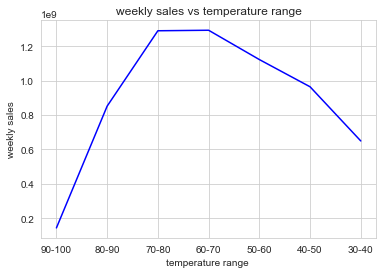

In [7]:
plt.grid()
temp_series.plot(color='b')
plt.title('weekly sales vs temperature range')
plt.ylabel('weekly sales')
plt.xlabel('temperature range ')

### Binning the temperature column and sorting them according to weekly sales

In [8]:
_30_40=final_data[(final_data.Temperature>30) & (final_data.Temperature< 40)]['Weekly_Sales'].sum()
_40_50=final_data[(final_data.Temperature>40) & (final_data.Temperature< 50)]['Weekly_Sales'].sum()
_50_60=final_data[(final_data.Temperature>50) & (final_data.Temperature< 60)]['Weekly_Sales'].sum()
_60_70=final_data[(final_data.Temperature>60) & (final_data.Temperature< 70)]['Weekly_Sales'].sum()
_70_80=final_data[(final_data.Temperature>70) & (final_data.Temperature< 80)]['Weekly_Sales'].sum()
_80_90=final_data[(final_data.Temperature>80) & (final_data.Temperature< 90)]['Weekly_Sales'].sum()
_90_100=final_data[(final_data.Temperature>90) & (final_data.Temperature< 100)]['Weekly_Sales'].sum()
dictionary={'_30_40':649176675.9499999,
            '_40_50':964084701.44,
            '_50_60':1122389636.8200002,
            '_60_70':1292714835.6399999,
            '_70_80':1289690535.0500002,
            '_80_90':851502899.1800001 ,
            '_90_100':143672161.36
           }
{k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1])}

{'_90_100': 143672161.36,
 '_30_40': 649176675.9499999,
 '_80_90': 851502899.1800001,
 '_40_50': 964084701.44,
 '_50_60': 1122389636.8200002,
 '_70_80': 1289690535.0500002,
 '_60_70': 1292714835.6399999}

### Inference
1.Basically i will do label encoding but on basis of weekly sales like here we can see that 60_70 slot is having highest weekly sales ,so i am giving it label 1

2.90_100 slot is havig lowest weekly sales ,so i am giving it last label i.e 7.So,  i have sorted each and every slots and given them label accordingly

In [9]:
def temp(data):
    data["Temp_bins"] = np.nan
    data.loc[((final_data.Temperature>30) & (data.Temperature< 40)) ,'Temp_bins']= 649176675.9499999
    data.loc[((final_data.Temperature>40) & (data.Temperature< 50)) ,'Temp_bins']= 964084701.44
    data.loc[((final_data.Temperature>50) & (data.Temperature< 60)) ,'Temp_bins']= 1122389636.8200002
    data.loc[((final_data.Temperature>60) & (data.Temperature< 70)) ,'Temp_bins']= 1292714835.6399999
    data.loc[((final_data.Temperature>70) & (data.Temperature< 80)) ,'Temp_bins']= 1289690535.0500002
    data.loc[((final_data.Temperature>80) & (data.Temperature< 90)) ,'Temp_bins']= 851502899.1800001
    data.loc[((final_data.Temperature>90) & (data.Temperature< 100)),'Temp_bins']= 143672161.36
    data.loc[data.Temp_bins.isnull() ,'Temp_bins']= 0
    return data
final_data=temp(final_data)   

## 2.Unemployment

In [10]:
raw_for_unemployement=final_data.groupby(['Unemployment'])['Weekly_Sales'].sum().reset_index()
final_data["Unemployment_bins"] = np.nan
for i,j in enumerate(raw_for_unemployement['Unemployment']):
    inp=raw_for_unemployement['Weekly_Sales'].iloc[i]
    final_data.loc[(final_data.Unemployment==j) ,'Unemployment_bins']= inp

Basically i have taken out weekly sales of all grouped unemployement values and then filled the total weekly sales as a label for the new feature i.e unemployment bins

## 3.Splitting Date into month,year,day,week

In [11]:
# Form Date, Year, Month, Week, Day
def split(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['Year'] = data['Date'].dt.year
    data['Month']= data['Date'].dt.month
    data['Week'] = data['Date'].dt.week
    data['Day']  = data['Date'].dt.day
    return data
final_data=split(final_data)

## 4.Number of days left from christmas
### I have to find generic function for days from christmas and thanksgiving

In [12]:
import datetime
def days_from_christmas_for_train(x):
    if x['Year']== 2010 :
        diff=datetime.datetime(2010, 12, 31)-x['Date']
        return diff.days
    if ((x['Year']== 2011) and (x['Date']< datetime.datetime(2011, 12, 30))):
        diff=datetime.datetime(2011, 12, 30)-x['Date']
        return diff.days
    else:
        return 0
final_data['diff_from_christmas'] = final_data.apply(days_from_christmas_for_train, axis=1)    

In [13]:
import datetime
def days_from_christmas_for_test(x):
    if x['Year']== 2010 :
        diff=datetime.datetime(2010, 12, 31)-x['Date']
        return diff.days
    if ((x['Year']== 2011) and (x['Date']< datetime.datetime(2011, 12, 30))):
        diff=datetime.datetime(2011, 12, 30)-x['Date']
        return diff.days
    if ((x['Year']== 2012) and (x['Date']< datetime.datetime(2012, 12, 28))):
        diff=datetime.datetime(2012, 12, 28)-x['Date']
        return diff.days
    if ((x['Year']== 2013) and (x['Date']< datetime.datetime(2013, 12, 27))):
        diff=datetime.datetime(2013, 12, 27)-x['Date']
        return diff.days
    else:
        return 0   

## 5.Number of days left from Thanksgiving

In [14]:


def days_from_thanksgiving_for_train(x):
    if ((x['Year']== 2010) and (x['Date']< datetime.datetime(2010, 11, 26))):
        diff=datetime.datetime(2010, 11, 26)-x['Date']
        return diff.days
    if ((x['Year']== 2011) and (x['Date']< datetime.datetime(2011, 11, 25))):
        diff=datetime.datetime(2011, 11, 25)-x['Date']
        return diff.days
    else:
        return 0
final_data['days_from_thanksgiving'] = final_data.apply(days_from_thanksgiving_for_train, axis=1)

In [15]:
def days_from_thanksgiving_for_test(x):
    if ((x['Year']== 2010) and (x['Date']< datetime.datetime(2010, 11, 26))):
        diff=datetime.datetime(2010, 11, 26)-x['Date']
        return diff.days
    if ((x['Year']== 2011) and (x['Date']< datetime.datetime(2011, 11, 25))):
        diff=datetime.datetime(2011, 11, 25)-x['Date']
        return diff.days
    if ((x['Year']== 2012) and (x['Date']< datetime.datetime(2012, 11, 23))):
        diff=datetime.datetime(2012, 11, 23)-x['Date']
        return diff.days
    if ((x['Year']== 2013) and (x['Date']< datetime.datetime(2013, 11, 29))):
        diff=datetime.datetime(2013, 11, 29)-x['Date']
        return diff.days
    else:
        return 0

## 6.Doing label encoding based on 4 different holiday week

In [16]:
final_data[final_data['IsHoliday']==True]['Week'].value_counts()

6     8874
36    8833
47    5946
52    5910
Name: Week, dtype: int64

 We can see that there is only 4 weeks which has holiday means for every year this week is the only week which contains specal holiday so we will create a new feature in which we will keep this week and if it has holiday

In [17]:
def holiday_type(x):
    if   (x['IsHoliday']== 1) & (x['Week']==6):
        return 1 #SuperBowl
    elif (x['IsHoliday']== 1) & (x['Week']==36):
        return 2 #LaborDay
    elif (x['IsHoliday']== 1) & (x['Week']==47):
        return 3 #Thanksgiving
    elif (x['IsHoliday']== 1) & (x['Week']==52):
        return 4 #Christmas
    else:
        return 0
#converting IsHoliday into 0 and 1
final_data['IsHoliday_bins'] = final_data.apply(holiday_type, axis=1)

## EDA on newly generated features

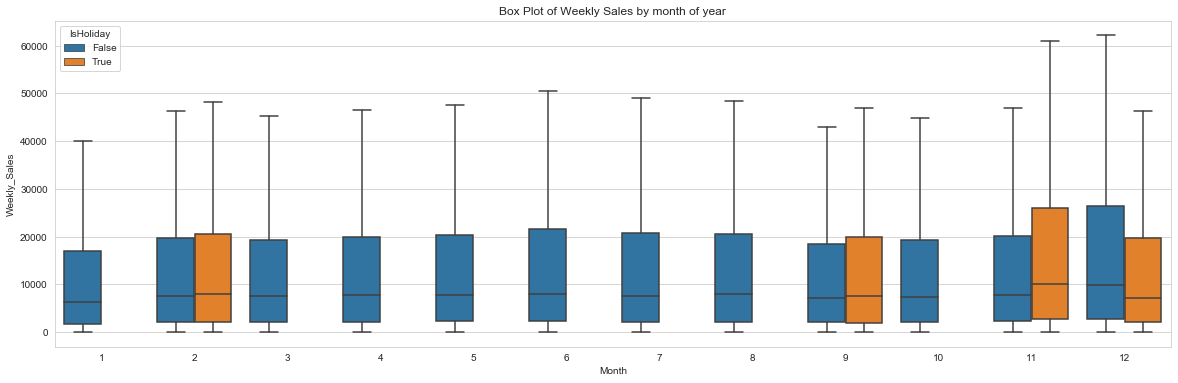

In [18]:
data5 = pd.concat([final_data['Month'], final_data['Weekly_Sales'], final_data['IsHoliday']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of Weekly Sales by month of year')
fig = sns.boxplot(x='Month', y='Weekly_Sales', data=data5, showfliers=False, hue='IsHoliday')

### Inference
1.We can say that weekly sales are higher in holiday week for almost all holiday except christmas ,this mayb because people generally have done shopping before christmas or had already done enough shopping on thanksgiving which is just before christmas month

### Visualising the difference in distribution of weekly sales for holiday week vs non holiday week of 4 main months which has holiday

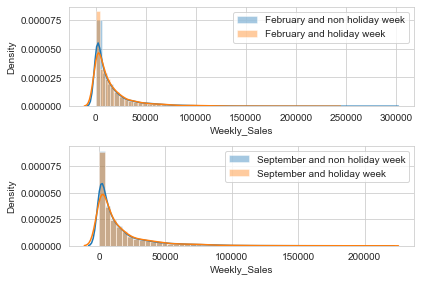

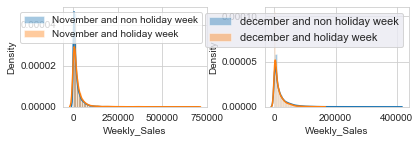

In [19]:
plt.figure(1)   
plt.subplot(411) 
sns.distplot(final_data[final_data['Month']==2]['Weekly_Sales'],label='February and non holiday week')
sns.distplot(final_data[((final_data['Month']==2) & (final_data['IsHoliday']==True))]['Weekly_Sales'],label='February and holiday week')
plt.legend()
plt.figure(1)   
plt.subplot(412)
sns.distplot(final_data[final_data['Month']==9]['Weekly_Sales'],label='September and non holiday week')
sns.distplot(final_data[((final_data['Month']==9) & (final_data['IsHoliday']==True))]['Weekly_Sales'],label='September and holiday week')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.legend()
plt.figure(2)   
plt.subplot(421)
sns.distplot(final_data[final_data['Month']==11]['Weekly_Sales'],label='November and non holiday week')
sns.distplot(final_data[((final_data['Month']==11) & (final_data['IsHoliday']==True))]['Weekly_Sales'],label='November and holiday week')
plt.legend()
plt.figure(2)   
plt.subplot(422)
sns.distplot(final_data[final_data['Month']==12]['Weekly_Sales'],label='december and non holiday week')
sns.distplot(final_data[((final_data['Month']==12) & (final_data['IsHoliday']==True))]['Weekly_Sales'],label='december and holiday week')
sns.set(rc={'figure.figsize':(12.7,6.27)})
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.legend()
plt.show()

### Inference
1.We can say that weekly sales for month november and december are higher in holiday vs non holiday week both

2.Difference in distribution of weekly sales in all holiday month for holiday vs non holiday week is very less.It's almost overlapping.

Text(0.5, 1.0, 'WEEKLY SALES  vs NUMBER OF DAYS LEFT FOR CHRISTMAS')

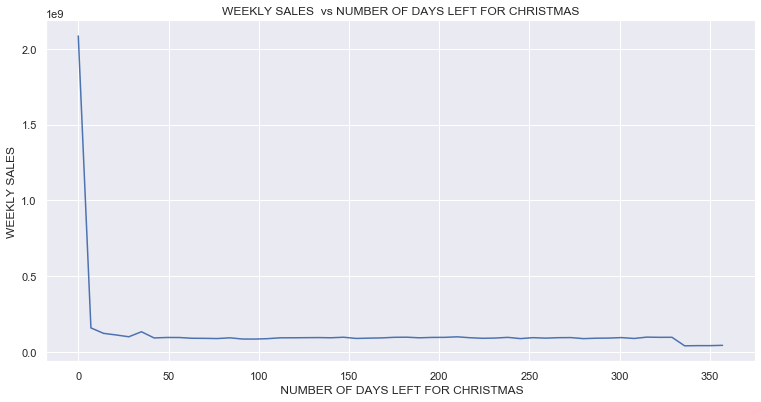

In [20]:
final_data.groupby(['diff_from_christmas'])['Weekly_Sales'].sum().plot()
plt.ylabel('WEEKLY SALES')
plt.xlabel(' NUMBER OF DAYS LEFT FOR CHRISTMAS')
plt.title('WEEKLY SALES  vs NUMBER OF DAYS LEFT FOR CHRISTMAS')

Text(0.5, 1.0, 'WEEKLY SALES  vs NUMBER OF DAYS LEFT FOR THANKSGIVING')

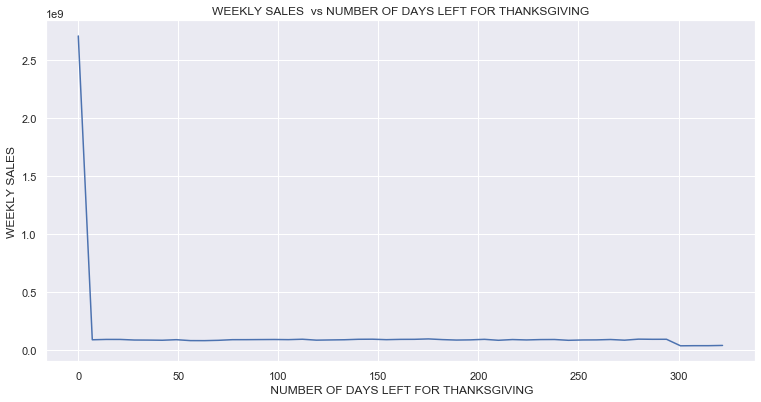

In [21]:
final_data.groupby(['days_from_thanksgiving'])['Weekly_Sales'].sum().plot()
plt.ylabel('WEEKLY SALES')
plt.xlabel(' NUMBER OF DAYS LEFT FOR THANKSGIVING')
plt.title('WEEKLY SALES  vs NUMBER OF DAYS LEFT FOR THANKSGIVING')

### Inference
1.In both plots we can see that as number of days we go farther the weekly sales is decreasing

2.There is a very high sales when we are close to zero means those are the closest days from christmas and thanksgiving.So, people tens to do more shopping before these holiday

### Giving labels to categorical values in isHoliday column and type column

In [22]:
final_data.loc[(final_data.IsHoliday==True) ,'IsHoliday']= 1
final_data.loc[(final_data.IsHoliday==False) ,'IsHoliday']= 0

In [23]:
final_data.loc[(final_data.Type=='A') ,'Type']= 1
final_data.loc[(final_data.Type=='B') ,'Type']= 2
final_data.loc[(final_data.Type=='C') ,'Type']= 3

In [24]:
final_data=final_data.reset_index(drop=True)

### Final columns

In [25]:
final_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Temp_bins',
       'Unemployment_bins', 'Year', 'Month', 'Week', 'Day',
       'diff_from_christmas', 'days_from_thanksgiving', 'IsHoliday_bins'],
      dtype='object')

## KL divergence function

In [26]:
from tqdm import tqdm
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

**We have to find correlation between Weekly sales  and categorical feature mentioned below:**
   - 1.Store
   - 2.Dept
   - 3.Year
   - 4.Month
   - 5.Week
   - 6.Day
   - 7.IsHoliday
   - 8.Type
   - 9.Unemployment_bins
   - 10.Temp_bins
   - 11.isholiday_bins


### 1.Correlation between store and weekly sales

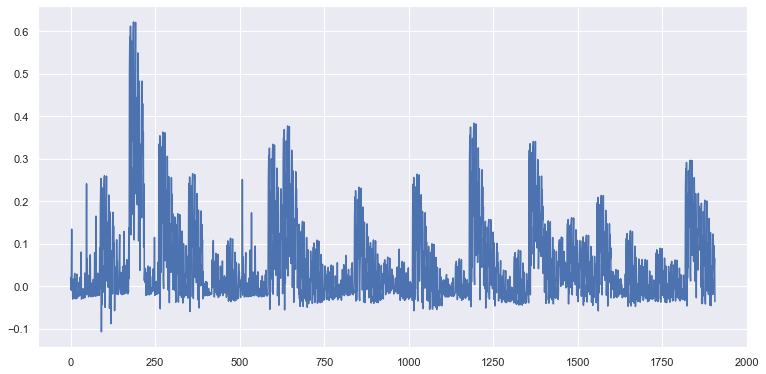

In [27]:
import tqdm.notebook as tq
store_num=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
kl_div_of_store=[]
for i in tq.tqdm(store_num):
    for j in store_num:
        if i!= j:
            x=final_data[final_data['Store']==i]['Weekly_Sales'].reset_index(drop=True)
            y=final_data[final_data['Store']==j]['Weekly_Sales'].reset_index(drop=True)
            mean_x=np.mean(x)
            mean_y=np.mean(y)
            std_x=np.std(x)
            std_y=np.std(y)
            p = norm.pdf(x, mean_x, std_x)
            q = norm.pdf(x, mean_y, std_y)
            kl_div_of_store.append(kl_divergence(p, q))
                
def filter(ar):
    return ar[np.isfinite(ar)]
raw=np.array(kl_div_of_store)
score_kl1=pd.Series(filter(raw))
score_kl1.plot()               

### 2.Correlation between Department and weekly sales

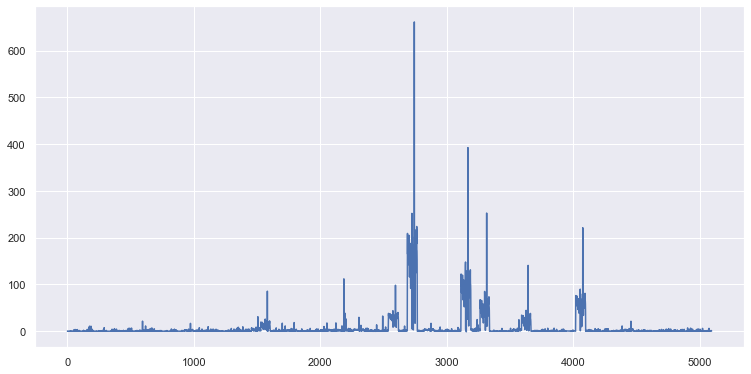

In [29]:
import tqdm.notebook as tq
dept_num=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
kl_div_of_Dept=[]
for i in tq.tqdm(dept_num):
    for j in dept_num:
        if i!= j:
            x=final_data[final_data['Dept']==i]['Weekly_Sales'].reset_index(drop=True)
            y=final_data[final_data['Dept']==j]['Weekly_Sales'].reset_index(drop=True)
            mean_x=np.mean(x)
            mean_y=np.mean(y)
            std_x=np.std(x)
            std_y=np.std(y)
            p = norm.pdf(x, mean_x, std_x)
            q = norm.pdf(x, mean_y, std_y)
            kl_div_of_Dept.append(kl_divergence(p, q))
                
def filter(ar):
    return ar[np.isfinite(ar)]
raw=np.array(kl_div_of_Dept)
score_kl2=pd.Series(filter(raw))
score_kl2.plot()                

### 3.Correlation between Year and weekly sales

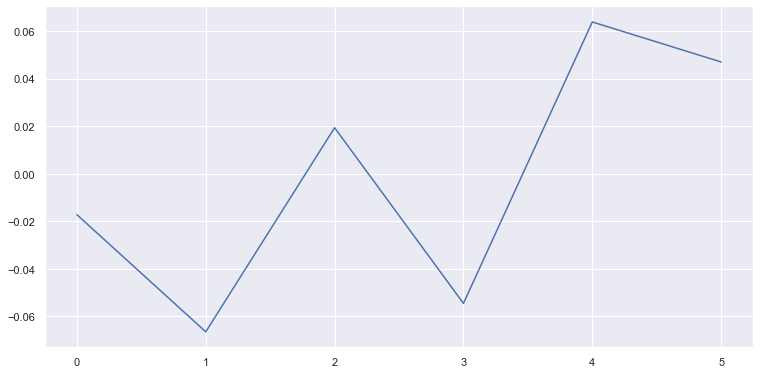

In [30]:
import tqdm.notebook as tq
Year_num=[ 2010,2011,2012]
kl_div_of_Year=[]
for i in tq.tqdm(Year_num):
    for j in Year_num:
        if i!= j:
            x=final_data[final_data['Year']==i]['Weekly_Sales'].reset_index(drop=True)
            y=final_data[final_data['Year']==j]['Weekly_Sales'].reset_index(drop=True)
            mean_x=np.mean(x)
            mean_y=np.mean(y)
            std_x=np.std(x)
            std_y=np.std(y)
            p = norm.pdf(x, mean_x, std_x)
            q = norm.pdf(x, mean_y, std_y)
            kl_div_of_Year.append(kl_divergence(p, q))
                
def filter(ar):
    return ar[np.isfinite(ar)]
raw=np.array(kl_div_of_Year)
score_kl3=pd.Series(filter(raw))
score_kl3.plot()                

### 4.Correlation between Month and weekly sales

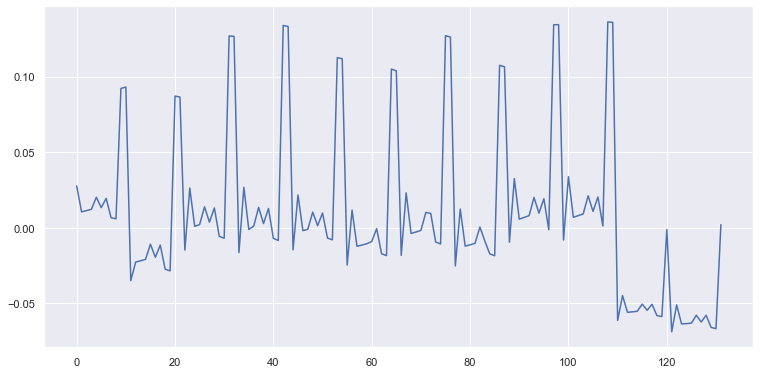

In [31]:
import tqdm.notebook as tq
Month_num=[1,2,3,4,5,6,7,8,9,10,11,12]
kl_div_of_Month=[]
for i in tq.tqdm(Month_num):
    for j in Month_num:
        if i!= j:
            x=final_data[final_data['Month']==i]['Weekly_Sales'].reset_index(drop=True)
            y=final_data[final_data['Month']==j]['Weekly_Sales'].reset_index(drop=True)
            mean_x=np.mean(x)
            mean_y=np.mean(y)
            std_x=np.std(x)
            std_y=np.std(y)
            p = norm.pdf(x, mean_x, std_x)
            q = norm.pdf(x, mean_y, std_y)
            kl_div_of_Month.append(kl_divergence(p, q))
                
def filter(ar):
    return ar[np.isfinite(ar)]
raw=np.array(kl_div_of_Month)
score_kl4=pd.Series(filter(raw))
score_kl4.plot()               

### 5.Correlation between Week and weekly sales

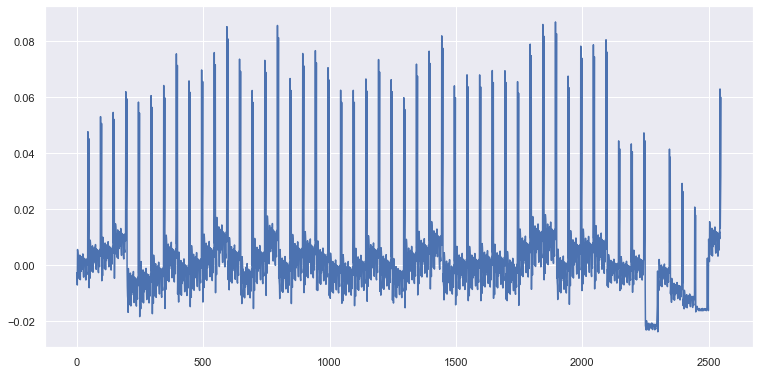

In [32]:
import tqdm.notebook as tq
week_num=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
kl_div_of_Week=[]
for i in tq.tqdm(week_num):
    for j in week_num:
        if i!= j:
            x=final_data[final_data['Week']==i]['Weekly_Sales'].reset_index(drop=True)
            y=final_data[final_data['Week']==j]['Weekly_Sales'].reset_index(drop=True)
            mean_x=np.mean(x)
            mean_y=np.mean(y)
            std_x=np.std(x)
            std_y=np.std(y)
            p = norm.pdf(x, mean_x, std_x)
            q = norm.pdf(x, mean_y, std_y)
            kl_div_of_Week.append(kl_divergence(p, q))
                
def filter(ar):
    return ar[np.isfinite(ar)]
raw=np.array(kl_div_of_Week)
score_kl5=pd.Series(filter(raw))
score_kl5.plot()               

### 6.Correlation between Day and weekly sales

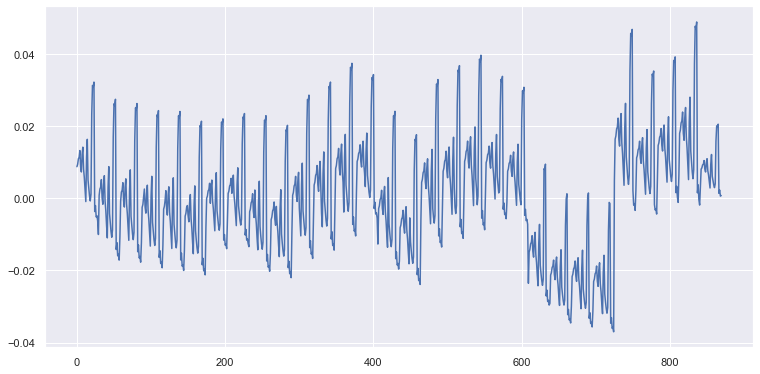

In [33]:
import tqdm.notebook as tq
day_num=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
kl_div_of_Day=[]
for i in tq.tqdm(day_num):
    for j in day_num:
        if i!= j:
            x=final_data[final_data['Day']==i]['Weekly_Sales'].reset_index(drop=True)
            y=final_data[final_data['Day']==j]['Weekly_Sales'].reset_index(drop=True)
            mean_x=np.mean(x)
            mean_y=np.mean(y)
            std_x=np.std(x)
            std_y=np.std(y)
            p = norm.pdf(x, mean_x, std_x)
            q = norm.pdf(x, mean_y, std_y)
            kl_div_of_Day.append(kl_divergence(p, q))
                
def filter(ar):
    return ar[np.isfinite(ar)]
raw=np.array(kl_div_of_Day)
score_kl6=pd.Series(filter(raw))
score_kl6.plot()               

### 7.Correlation between IsHoliday and weekly sales

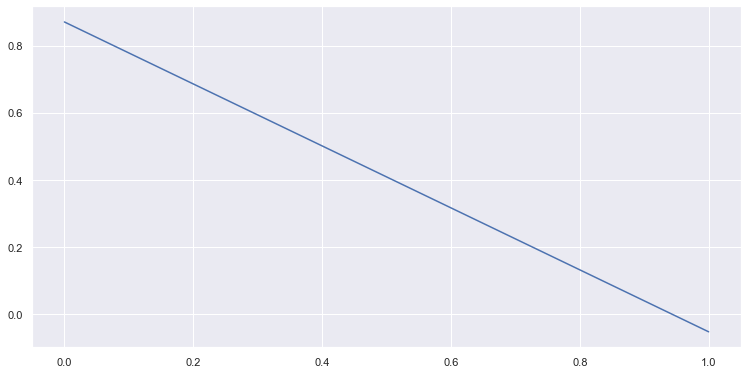

In [34]:
import tqdm.notebook as tq
holiday_num=[ 0,1]
kl_div_of_holiday=[]
for i in tq.tqdm(holiday_num):
    for j in holiday_num:
        if i!= j:
            x=final_data[final_data['IsHoliday']==i]['Weekly_Sales'].reset_index(drop=True)
            y=final_data[final_data['IsHoliday']==j]['Weekly_Sales'].reset_index(drop=True)
            mean_x=np.mean(x)
            mean_y=np.mean(y)
            std_x=np.std(x)
            std_y=np.std(y)
            p = norm.pdf(x, mean_x, std_x)
            q = norm.pdf(x, mean_y, std_y)
            kl_div_of_holiday.append(kl_divergence(p, q))
                
def filter(ar):
    return ar[np.isfinite(ar)]
raw=np.array(kl_div_of_holiday)
score_kl7=pd.Series(filter(raw))
score_kl7.plot()               

### 8.Correlation between Type and weekly sales

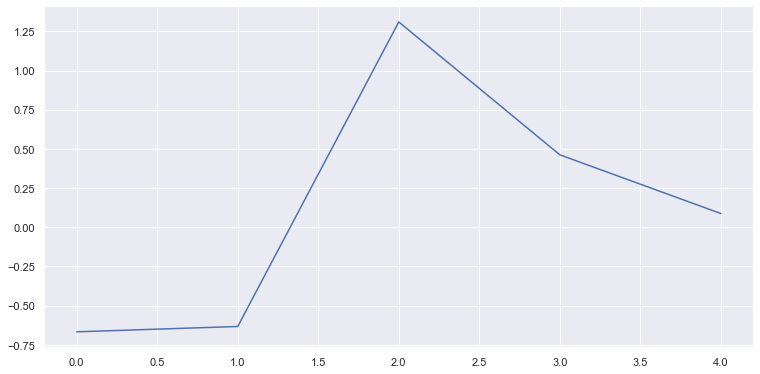

In [35]:
import tqdm.notebook as tq
type_num=[ 1,2,3]
kl_div_of_type=[]
for i in tq.tqdm(type_num):
    for j in type_num:
        if i!= j:
            x=final_data[final_data['Type']==i]['Weekly_Sales'].reset_index(drop=True)
            y=final_data[final_data['Type']==j]['Weekly_Sales'].reset_index(drop=True)
            mean_x=np.mean(x)
            mean_y=np.mean(y)
            std_x=np.std(x)
            std_y=np.std(y)
            p = norm.pdf(x, mean_x, std_x)
            q = norm.pdf(x, mean_y, std_y)
            kl_div_of_type.append(kl_divergence(p, q))
def filter(ar):
    return ar[np.isfinite(ar)]
raw=np.array(kl_div_of_type)
score_kl8=pd.Series(filter(raw))
score_kl8.plot()               

### 9.Correlation between unemployement bins and weekly sales

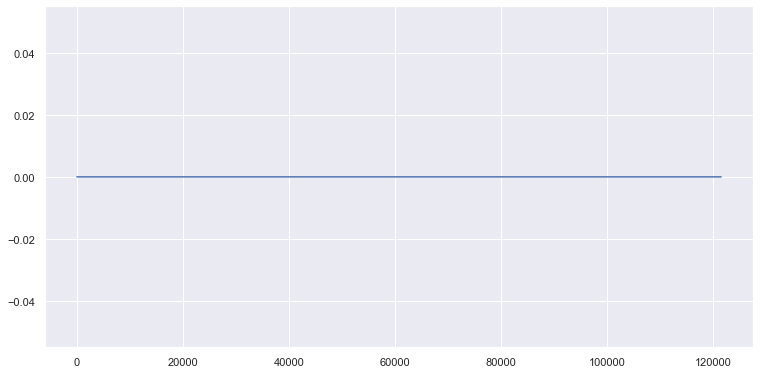

In [36]:
import tqdm.notebook as tq
type_unemployemengt_bins=raw_for_unemployement['Unemployment'].tolist()
kl_div_of_unemployement_bins=[]
for i in tq.tqdm(type_unemployemengt_bins):
    for j in type_unemployemengt_bins:
        if i!= j:
            x=final_data[final_data['Unemployment_bins']==i]['Weekly_Sales'].reset_index(drop=True)
            y=final_data[final_data['Unemployment_bins']==j]['Weekly_Sales'].reset_index(drop=True)
            mean_x=np.mean(x)
            mean_y=np.mean(y)
            std_x=np.std(x)
            std_y=np.std(y)
            p = norm.pdf(x, mean_x, std_x)
            q = norm.pdf(x, mean_y, std_y)
            kl_div_of_unemployement_bins.append(kl_divergence(p, q))
def filter(ar):
    return ar[np.isfinite(ar)]
raw=np.array(kl_div_of_unemployement_bins)
score_kl9=pd.Series(filter(raw))
score_kl9.plot()               

### 10.Correlation between Temperature bins and weekly sales

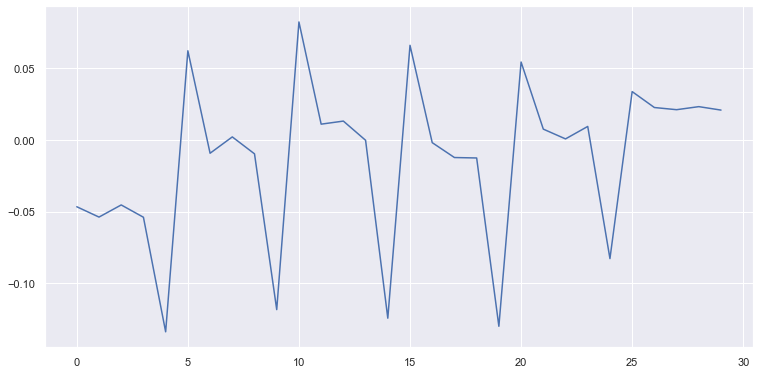

In [37]:
import tqdm.notebook as tq
type_temp_bins=[964084701.44,1122389636.8200002,1292714835.6399999,1289690535.0500002,851502899.1800001,143672161.36]
kl_div_of_temp_bins=[]
for i in tq.tqdm(type_temp_bins):
    for j in type_temp_bins:
        if i!= j:
            x=final_data[final_data['Temp_bins']==i]['Weekly_Sales'].reset_index(drop=True)
            y=final_data[final_data['Temp_bins']==j]['Weekly_Sales'].reset_index(drop=True)
            mean_x=np.mean(x)
            mean_y=np.mean(y)
            std_x=np.std(x)
            std_y=np.std(y)
            p = norm.pdf(x, mean_x, std_x)
            q = norm.pdf(x, mean_y, std_y)
            kl_div_of_temp_bins.append(kl_divergence(p, q))
def filter(ar):
    return ar[np.isfinite(ar)]
raw=np.array(kl_div_of_temp_bins)
score_kl10=pd.Series(filter(raw))
score_kl10.plot()               

### 10.Correlation between holiday bins and weekly sales

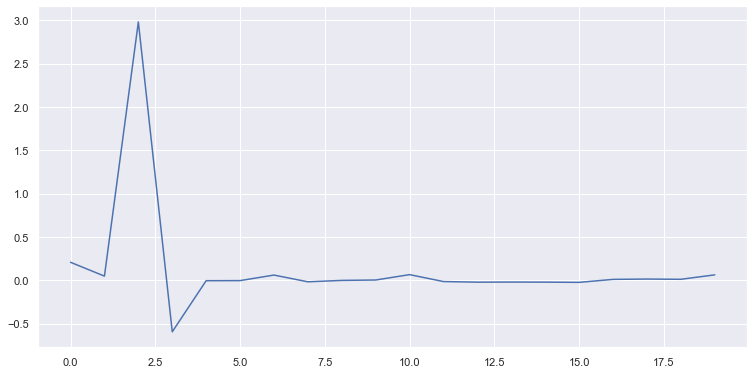

In [38]:
import tqdm.notebook as tq
type_holiday_bins=[0,1,2,3,4]
kl_div_of_holiday_bins=[]
for i in tq.tqdm(type_holiday_bins):
    for j in type_holiday_bins:
        if i!= j:
            x=final_data[final_data['IsHoliday_bins']==i]['Weekly_Sales'].reset_index(drop=True)
            y=final_data[final_data['IsHoliday_bins']==j]['Weekly_Sales'].reset_index(drop=True)
            mean_x=np.mean(x)
            mean_y=np.mean(y)
            std_x=np.std(x)
            std_y=np.std(y)
            p = norm.pdf(x, mean_x, std_x)
            q = norm.pdf(x, mean_y, std_y)
            kl_div_of_holiday_bins.append(kl_divergence(p, q))
def filter(ar):
    return ar[np.isfinite(ar)]
raw=np.array(kl_div_of_holiday_bins)
score_kl11=pd.Series(filter(raw))
score_kl11.plot()               

**Mean value of kl divergence between Weekly sales and categorical feature is mentioned below:**

In [39]:
print('kl divergence between Dept and weekly sales is               :',np.mean(score_kl2))
print('kl divergence between Year and weekly sales is               :',np.mean(score_kl3))
print('kl divergence between Month and weekly sales is              :',np.mean(score_kl4))
print('kl divergence between week and weekly sales is               : ',np.mean(score_kl5))
print('kl divergence between Day and weekly sales is                :',np.mean(score_kl6))
print('kl divergence between isholiday and weekly sales is          :',np.mean(score_kl7))
print('kl divergence between type and weekly sales is               :',np.mean(score_kl8))
print('kl divergence between unemployement bins and weekly sales is :',np.mean(score_kl9))
print('kl divergence between temperature bins and weekly sales is   :',np.mean(score_kl10))
print('kl divergence between isholiday bins and weekly sales is     :',np.mean(score_kl11))

kl divergence between Dept and weekly sales is               : 7.560782282963625
kl divergence between Year and weekly sales is               : -0.001325555527437277
kl divergence between Month and weekly sales is              : 0.008854563876638136
kl divergence between week and weekly sales is               :  0.0024032339909228788
kl divergence between Day and weekly sales is                : 0.00030054773680560364
kl divergence between isholiday and weekly sales is          : 0.4087893524067353
kl divergence between type and weekly sales is               : 0.11182694492132148
kl divergence between unemployement bins and weekly sales is : 0.0
kl divergence between temperature bins and weekly sales is   : -0.01358622279094625
kl divergence between isholiday bins and weekly sales is     : 0.1372364961098097


## LOSS FUNCTION

In [30]:
def wmae(data,y,yhat):
    w=0
    sum=0
    c=0
    data['Date']= pd.to_datetime(data['Date'])
    for i,j,k in zip(y,yhat,data['Date']):
        if (k.strftime('%Y-%m-%d')=='2010-02-12') or (k.strftime('%Y-%m-%d')=='2010-09-10') or (k.strftime('%Y-%m-%d')=='2010-11-26') or (k.strftime('%Y-%m-%d')=='2010-12-31') or (k.strftime('%Y-%m-%d')=='2011-02-11') or (k.strftime('%Y-%m-%d')=='2011-09-09') or   (k.strftime('%Y-%m-%d')=='2011-11-25') or (k.strftime('%Y-%m-%d')=='2011-12-30') or (k.strftime('%Y-%m-%d')=='2012-02-10') or (k.strftime('%Y-%m-%d')=='2012-09-07') or (k.strftime('%Y-%m-%d')=='2012-11-23') or (k.strftime('%Y-%m-%d')=='2012-12-28'):
            w=w+5
            sum=sum+(5*abs(i-j))
        else:
            w=w+1
            sum=sum+(1*abs(i-j))   
    wmae_score=sum/w
    return wmae_score

# Method 1
### Using Linear regression

In [35]:
final_data['Date'] = pd.to_numeric(pd.to_datetime(final_data['Date']))

y = final_data['Weekly_Sales']
X = final_data.drop(['Weekly_Sales'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Train:Test = 70:30 splitting.
# Final shapes.
print('Train shape:', X_train.shape, y_train.shape)
print('Test shape: ', X_test.shape, y_test.shape)

Train shape: (294199, 24) (294199,)
Test shape:  (126086, 24) (126086,)


In [44]:
model_lr = LinearRegression(fit_intercept=True,normalize=True).fit(X_train,y_train)
y_pred_train_lr = model_lr.predict(X_train)
y_pred_test_lr = model_lr.predict(X_test)
print("Train WMAE-", wmae(X_train, y_train, y_pred_train_lr))
print("Test WMAE-", wmae(X_test, y_test, y_pred_test_lr))

Train WMAE- 14890.689406816356
Test WMAE- 14867.244412030479


# METHOD 2
### Using Linear regression

In [45]:
def model1(X_train,y_train,X_test):
    model_lr = LinearRegression(fit_intercept=True,normalize=True,n_jobs=-1).fit(X_train,y_train)
    y_pred_train_lr = model_lr.predict(X_train)
    y_pred_test_lr = model_lr.predict(X_test)
    return y_pred_train_lr,y_pred_test_lr

In [46]:
from tqdm import tqdm
import tqdm.notebook as tq
store_num=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
dept_num=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
count=0
score1=0
score2=0
for i in tq.tqdm(store_num):
    raw_data=final_data[(final_data['Store']==i)]
    y = raw_data['Weekly_Sales']
    X = raw_data.drop(['Weekly_Sales'], axis=1) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    count=count+1
    y_pred_train_lr,y_pred_test_lr=model1(X_train,y_train,X_test)
    score1=score1+wmae(X_train, y_train, y_pred_train_lr)
    score2=score2+wmae(X_train, y_train, y_pred_test_lr)
print('final train wmae score is :',score1/count)
print('final test wmae score is :',score2/count)


final train wmae score is : 13746.08422912665
final test wmae score is : 14554.925884105258


### kNN

In [47]:
final_data['Date'] = pd.to_numeric(pd.to_datetime(final_data['Date']))
y = final_data['Weekly_Sales']
X = final_data.drop(['Weekly_Sales'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Train:Test = 70:30 splitting.
print('Train shape:', X_train.shape, y_train.shape)
print('Test shape: ', X_test.shape, y_test.shape)

neigh = KNeighborsRegressor(n_jobs=-1)
parameters = {'n_neighbors':list(range(1,26,3))}
clf = RandomizedSearchCV(neigh, parameters, cv=4)
clf.fit(X_train, y_train)

Train shape: (294199, 24) (294199,)
Test shape:  (126086, 24) (126086,)


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None, n_jobs=-1,
                                                 n_neighbors=5, p=2,
                                                 weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 4, 7, 10, 13, 16, 19,
                                                        22, 25]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [48]:
clf.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                    weights='uniform')

In [49]:
neigh = KNeighborsRegressor(n_neighbors=4, n_jobs=-1)
neigh.fit(X_train, y_train)
y_tr_knn = neigh.predict(X_train)
y_test_knn = neigh.predict(X_test)
print("Train WMAE-", wmae(X_train, y_train, y_tr_knn))
print("Test WMAE-", wmae(X_test, y_test, y_test_knn))

Train WMAE- 9859.970789092256
Test WMAE- 12993.101598409712


## RANDOM FOREST

### hyperparameter tunning with RandomizedSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
final_data['Date'] = pd.to_numeric(pd.to_datetime(final_data['Date']))
y = final_data['Weekly_Sales']
X = final_data.drop(['Weekly_Sales'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Train:Test = 70:30 splitting.
print('Train:', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)
n_estimators = [100,120,140]
# max_depth = [25, 27, 30]
# Create the param grid

param_grid = {'n_estimators': n_estimators}
#               'max_depth': max_depth

print(param_grid)
rf_Model = RandomForestRegressor(n_jobs = -1)

from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 4, verbose=2, n_jobs = -1)
rf_RandomGrid.fit(X_train, y_train)

Train: (294199, 24) (294199,)
Test (126086, 24) (126086,)
{'n_estimators': [100, 120, 140]}
Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
rf_RandomGrid.best_params_

In [36]:
rf_Model = RandomForestRegressor(n_estimators= 500,min_samples_split= 5,min_samples_leaf= 2,max_features='auto',max_depth=50,
 bootstrap=True,n_jobs = -1)
rf_Model.fit(X_train, y_train)
y_tr_rf = rf_Model.predict(X_train)
y_test_rf = rf_Model.predict(X_test)
print("Train WMAE-", wmae(X_train, y_train, y_tr_rf))
print("Test WMAE-", wmae(X_test, y_test, y_test_rf))

Train WMAE- 791.9720888012049
Test WMAE- 1550.397940527693


In [ ]:
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]# Number of trees in random forest
# max_features = ['auto', 'sqrt']                               # Number of features to consider at every split
# max_depth = [2,4]                                             # Maximum number of levels in tree
# min_samples_split = [2, 5]                                    # Minimum number of samples required to split a node
# min_samples_leaf = [1, 2]                                     # Minimum number of samples required at each leaf node
# bootstrap = [True, False]                                     # Method of selecting samples for training each tree

# # Create the param grid
# param_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(param_grid)
# rf_Model = RandomForestRegressor()

# from sklearn.model_selection import RandomizedSearchCV
# rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = -1)
# rf_RandomGrid.fit(X_train, y_train)